In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import TensorDataset, DataLoader

In [ ]:
url  = 'https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data'
data = pd.read_csv(url,sep=',',header=None)

In [ ]:
data.columns = ['age','sex','cp','trestbps','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal','DISEASE']

In [ ]:
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,DISEASE
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,2
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,3
301,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.0,3.0,1


In [ ]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.438944,9.038662,29.0,48.0,56.0,61.0,77.0
sex,303.0,0.679868,0.467299,0.0,0.0,1.0,1.0,1.0
cp,303.0,3.158416,0.960126,1.0,3.0,3.0,4.0,4.0
trestbps,303.0,131.689769,17.599748,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.693069,51.776918,126.0,211.0,241.0,275.0,564.0
fbs,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
restecg,303.0,0.990099,0.994971,0.0,0.0,1.0,2.0,2.0
thalach,303.0,149.607261,22.875003,71.0,133.5,153.0,166.0,202.0
exang,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    float64
 1   sex       303 non-null    float64
 2   cp        303 non-null    float64
 3   trestbps  303 non-null    float64
 4   chol      303 non-null    float64
 5   fbs       303 non-null    float64
 6   restecg   303 non-null    float64
 7   thalach   303 non-null    float64
 8   exang     303 non-null    float64
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    float64
 11  ca        303 non-null    object 
 12  thal      303 non-null    object 
 13  DISEASE   303 non-null    int64  
dtypes: float64(11), int64(1), object(2)
memory usage: 33.3+ KB


In [ ]:
data.duplicated().sum()

0

In [ ]:
data = data.replace('?',np.nan).dropna()

<ipython-input-1309-50f38d1365f5>:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(),rotation=45)


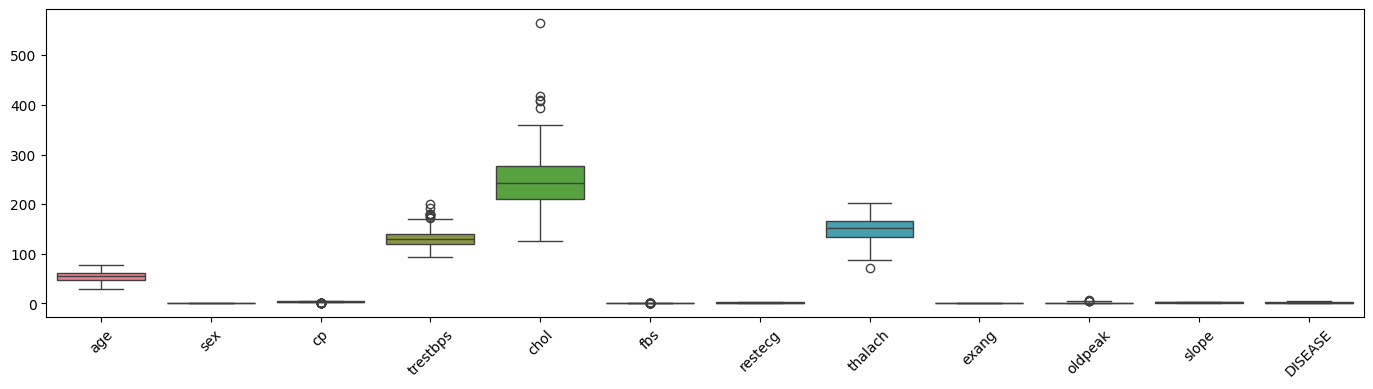

In [ ]:
fig,ax = plt.subplots(1,figsize=(17,4))
ax = sns.boxplot(data=data)
ax.set_xticklabels(ax.get_xticklabels(),rotation=45)
plt.show()

In [ ]:
data = data[data['chol']<400]

<ipython-input-1311-50f38d1365f5>:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(),rotation=45)


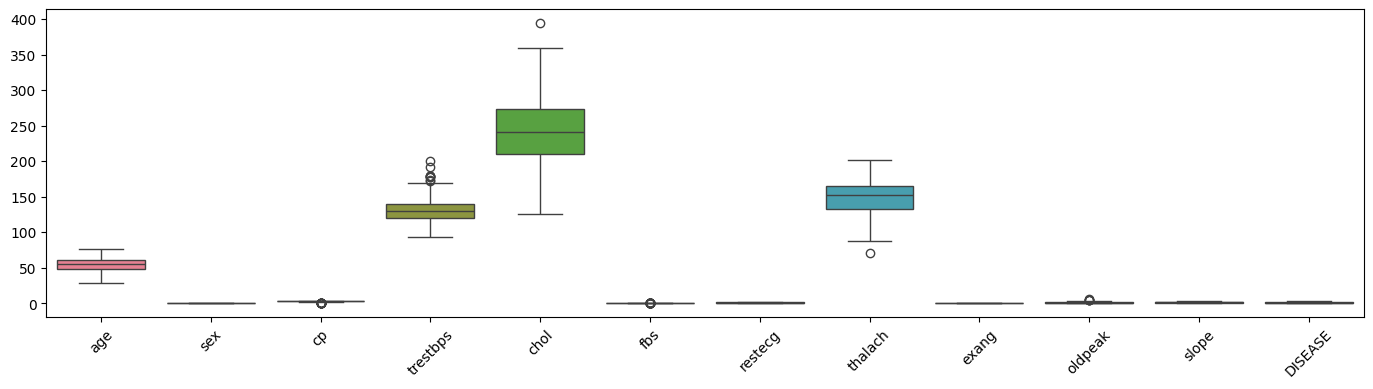

In [ ]:
fig,ax = plt.subplots(1,figsize=(17,4))
ax = sns.boxplot(data=data)
ax.set_xticklabels(ax.get_xticklabels(),rotation=45)
plt.show()

In [ ]:
data['DISEASE'].value_counts()

,count
DISEASE,
0,158
1,54
3,35
2,34
4,12


In [ ]:
data.loc[data['DISEASE']>0,'DISEASE']=1

In [ ]:
data['DISEASE']

,DISEASE
0,0
1,1
2,1
3,0
4,0
...,...
297,1
298,1
299,1
300,1


In [ ]:
scaler = MinMaxScaler()

In [ ]:
X = data.drop('DISEASE',axis=1)
y = data['DISEASE']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32).unsqueeze(1)  # For binary classification
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32).unsqueeze(1)

In [ ]:
class ANNModel(nn.Module):
  def __init__(self,input_dim):
    super().__init__()
    self.fc1 = nn.Linear(input_dim,64)
    self.fc2 = nn.Linear(64,32)
    self.fc3 = nn.Linear(32,16)
    self.fc4 = nn.Linear(16,1)
  def forward(self,X):
    X = F.relu(self.fc1(X))
    X = F.relu(self.fc2(X))
    X = F.relu(self.fc3(X))
    X = self.fc4(X)
    return F.sigmoid(X)

In [ ]:
input_dim = X_train.shape[1]
model = ANNModel(input_dim)
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(),lr=0.001)

In [ ]:
import time
start_time = time.time()
epochs = 600
losses = []
for epoch in range(epochs):
    model.train()

    # Forward pass
    y_pred = model(X_train_tensor)
    loss = criterion(y_pred, y_train_tensor)
    losses.append(loss.item())

    # Backward pass and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if (epoch + 1) % 10 == 0:
        print(f"Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}")

total_time = time.time() - start_time
print(f'Duration: {total_time/60:.2f} minutes')

Epoch [10/600], Loss: 0.6842
Epoch [20/600], Loss: 0.6694
Epoch [30/600], Loss: 0.6394
Epoch [40/600], Loss: 0.5892
Epoch [50/600], Loss: 0.5180
Epoch [60/600], Loss: 0.4476
Epoch [70/600], Loss: 0.3969
Epoch [80/600], Loss: 0.3654
Epoch [90/600], Loss: 0.3437
Epoch [100/600], Loss: 0.3255
Epoch [110/600], Loss: 0.3089
Epoch [120/600], Loss: 0.2927
Epoch [130/600], Loss: 0.2772
Epoch [140/600], Loss: 0.2629
Epoch [150/600], Loss: 0.2489
Epoch [160/600], Loss: 0.2352
Epoch [170/600], Loss: 0.2215
Epoch [180/600], Loss: 0.2075
Epoch [190/600], Loss: 0.1933
Epoch [200/600], Loss: 0.1781
Epoch [210/600], Loss: 0.1620
Epoch [220/600], Loss: 0.1459
Epoch [230/600], Loss: 0.1297
Epoch [240/600], Loss: 0.1142
Epoch [250/600], Loss: 0.0996
Epoch [260/600], Loss: 0.0865
Epoch [270/600], Loss: 0.0752
Epoch [280/600], Loss: 0.0652
Epoch [290/600], Loss: 0.0567
Epoch [300/600], Loss: 0.0491
Epoch [310/600], Loss: 0.0427
Epoch [320/600], Loss: 0.0373
Epoch [330/600], Loss: 0.0327
Epoch [340/600], Lo

Text(0.5, 0, 'Epoch')

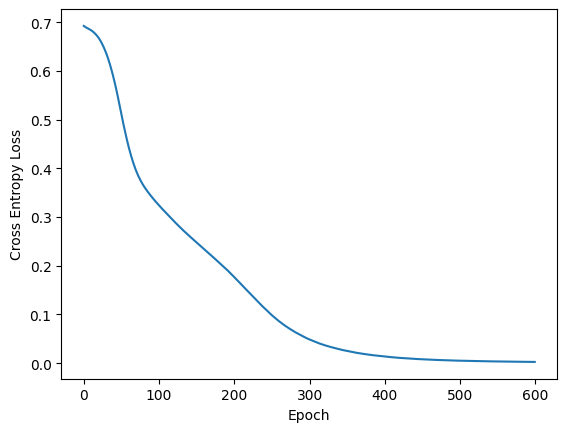

In [ ]:
plt.plot(range(epochs),losses)
plt.ylabel('Cross Entropy Loss')
plt.xlabel('Epoch')

In [ ]:
# Evaluate the model
model.eval()
with torch.no_grad():
    y_pred_test = model(X_test_tensor)
    y_pred_test = (y_pred_test >= 0.5).float()
    accuracy = accuracy_score(y_test_tensor, y_pred_test)
    print(f"Test Accuracy: {accuracy:.4f}")

Test Accuracy: 0.8475


In [ ]:
confusion_matrix(y_test_tensor,y_pred_test)

array([[27,  5],
       [ 4, 23]])

In [ ]:
print(classification_report(y_test_tensor,y_pred_test))

              precision    recall  f1-score   support

         0.0       0.87      0.84      0.86        32
         1.0       0.82      0.85      0.84        27

    accuracy                           0.85        59
   macro avg       0.85      0.85      0.85        59
weighted avg       0.85      0.85      0.85        59



In [ ]:
data.iloc[290]

,299
age,68.0
sex,1.0
cp,4.0
trestbps,144.0
chol,193.0
fbs,1.0
restecg,0.0
thalach,141.0
exang,0.0
oldpeak,3.4


In [ ]:
single_test_example = data.iloc[290].drop('DISEASE').values
single_test_example = scaler.transform(single_test_example.reshape(1, -1))
single_test_example = torch.tensor(single_test_example, dtype=torch.float32)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


In [ ]:
single_test_label = data.iloc[290]['DISEASE']

In [ ]:
# Pass the test example through the model
model.eval()
with torch.no_grad():
    single_prediction = model(single_test_example)
    single_prediction_label = (single_prediction >= 0.5).float().item()  # Threshold at 0.5

# Display the output
print(f"Actual Label: {single_test_label}")
print(f"Model Raw Output: {single_prediction.item():.4f}")
print(f"Predicted Label: {single_prediction_label}")

Actual Label: 1
Model Raw Output: 1.0000
Predicted Label: 1.0
